# Menginstal Library

In [ ]:
!pip install nltk
!pip install nlpaug
!pip install Sastrawi
!pip install scikit-learn

# Load & Cek Data

In [21]:
import pandas as pd
import numpy as np

                       film  \
0  Aku Tahu Kapan Kamu Mati   
1                 Dignitate   
2           Guru-Guru Gokil   
3                     Janin   
4                Mangkujiwo   

                                            sinopsis   genre  
0  Setelah kematian yang tampak, Siena mampu meli...   Horor  
1  Alfi (Al Ghazali) bertemu dengan Alana (Caitli...   Drama  
2  Ketika gaji staf di sekolahnya dicuri, seorang...  Komedi  
3  Randu (Reuben Elishama Hadju) dan Dinar (Jill ...   Horor  
4  Lahir dari Kuntilanak dari Cermin Kembar denga...   Horor  
                          film  \
1733           Winter in Tokyo   
1734           Petualang Cinta   
1735          Last Night (III)   
1736             Path of Light   
1737  Kulihat cinta di matanya   

                                               sinopsis     genre  
1733  Winter in Tokyo berpusat pada kehidupan Ishida...  Romantis  
1734  Markonah melarikan diri ke Jakarta karena akan...  Romantis  
1735  Tempat pengambilan l

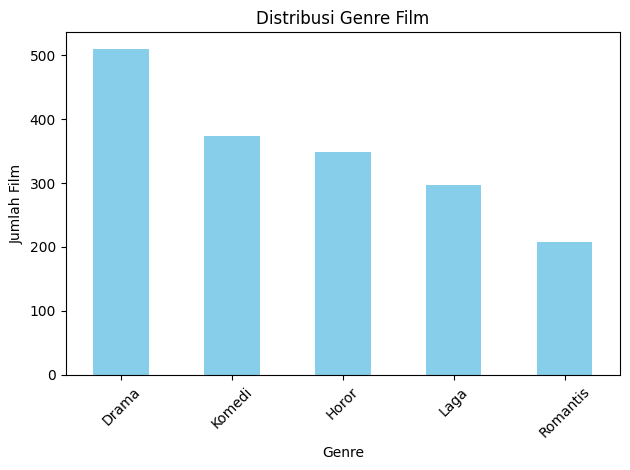

In [27]:
datafile = pd.read_csv('movies.csv')
print(datafile.head())
print(datafile.tail())
print(datafile.info()) # Menampilkan tipe data dan info memori
print(datafile.isnull().sum()) # Mengecek jumlah data kosong di setiap kolom

genre_distribution = datafile['genre'].value_counts() # Menghitung frekuensi tiap genre
print("Distribusi Genre (Jumlah Film per Genre):")
print(genre_distribution)

genre_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribusi Genre Film')
plt.xlabel('Genre')
plt.ylabel('Jumlah Film')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Preprocessing

In [28]:
import string, re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mahda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mahda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Case Folding

In [29]:
datafile['lowercase'] = datafile['sinopsis'].str.lower()

casefolding = pd.DataFrame(datafile['lowercase'])
print(casefolding)

                                              lowercase
0     setelah kematian yang tampak, siena mampu meli...
1     alfi (al ghazali) bertemu dengan alana (caitli...
2     ketika gaji staf di sekolahnya dicuri, seorang...
3     randu (reuben elishama hadju) dan dinar (jill ...
4     lahir dari kuntilanak dari cermin kembar denga...
...                                                 ...
1733  winter in tokyo berpusat pada kehidupan ishida...
1734  markonah melarikan diri ke jakarta karena akan...
1735  tempat pengambilan lebih dari 36 jam, last nig...
1736  proyek ini adalah tentang seorang lelaki indo-...
1737  atika (meriam bellina) mantan penyanyi tenar, ...

[1738 rows x 1 columns]


Remove Punctuations

In [16]:
def remove_punctuations(text):
    clean_spcl = re.compile('[/(){}\[\]\|@,;]') 
    clean_symbol = re.compile('[^0-9a-z]')
    text = clean_spcl.sub('', text)
    text = clean_symbol.sub(' ', text)
    return text

datafile['cleanpunct'] = datafile['lowercase'].apply(remove_punctuations)
cleanpunct = pd.DataFrame(datafile['cleanpunct'])
print(cleanpunct)

                                             cleanpunct
0     setelah kematian yang tampak siena mampu melih...
1     alfi al ghazali bertemu dengan alana caitlin h...
2     ketika gaji staf di sekolahnya dicuri seorang ...
3     randu reuben elishama hadju dan dinar jill gla...
4     lahir dari kuntilanak dari cermin kembar denga...
...                                                 ...
1733  winter in tokyo berpusat pada kehidupan ishida...
1734  markonah melarikan diri ke jakarta karena akan...
1735  tempat pengambilan lebih dari 36 jam last nigh...
1736  proyek ini adalah tentang seorang lelaki indo ...
1737  atika meriam bellina mantan penyanyi tenar ber...

[1738 rows x 1 columns]


Tokenize

In [17]:
def tokenisasi(text):
    tokens = word_tokenize(text)
    return tokens

datafile['tokens'] = datafile['cleanpunct'].apply(tokenisasi)
tokenize = pd.DataFrame(datafile['tokens'])
print(tokenize)

                                                 tokens
0     [setelah, kematian, yang, tampak, siena, mampu...
1     [alfi, al, ghazali, bertemu, dengan, alana, ca...
2     [ketika, gaji, staf, di, sekolahnya, dicuri, s...
3     [randu, reuben, elishama, hadju, dan, dinar, j...
4     [lahir, dari, kuntilanak, dari, cermin, kembar...
...                                                 ...
1733  [winter, in, tokyo, berpusat, pada, kehidupan,...
1734  [markonah, melarikan, diri, ke, jakarta, karen...
1735  [tempat, pengambilan, lebih, dari, 36, jam, la...
1736  [proyek, ini, adalah, tentang, seorang, lelaki...
1737  [atika, meriam, bellina, mantan, penyanyi, ten...

[1738 rows x 1 columns]


Stopwords

In [18]:
def clean_stopwords(tokens):
    stopword_id= set(stopwords.words('indonesian'))
    stopword_eng = set(stopwords.words('english'))
    text = [word for word in tokens if word not in stopword_id and word not in stopword_eng]
    return text

datafile['stopword'] = datafile['tokens'].apply(clean_stopwords)
stopword = pd.DataFrame(datafile['stopword'])
print(stopword)

                                               stopword
0     [kematian, siena, tanda, tanda, orang, orang, ...
1     [alfi, al, ghazali, bertemu, alana, caitlin, h...
2     [gaji, staf, sekolahnya, dicuri, guru, enggan,...
3     [randu, reuben, elishama, hadju, dinar, jill, ...
4     [lahir, kuntilanak, cermin, kembar, kesengsara...
...                                                 ...
1733  [winter, tokyo, berpusat, kehidupan, ishida, k...
1734  [markonah, melarikan, jakarta, dijodohkan, ora...
1735  [pengambilan, 36, jam, last, night, pasangan, ...
1736  [proyek, lelaki, indo, trinidadian, india, men...
1737  [atika, meriam, bellina, mantan, penyanyi, ten...

[1738 rows x 1 columns]


Stemming

In [19]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(tokens):
   stems = [stemmer.stem(word) for word in tokens]
   return ' '.join(stems)

datafile['stemming'] = datafile['stopword'].apply(stemming)
stemming = pd.DataFrame(datafile['stemming'])
print(stemming)

datafile[['genre', 'sinopsis', 'lowercase', 'cleanpunct', 'tokens', 'stopword', 'stemming']].to_csv('preprocessing2.csv', index=False)
print("File berhasil disimpan.")

                                               stemming
0     mati siena tanda tanda orang orang tinggal tem...
1     alf al ghazali temu alana caitlin halderman si...
2     gaji staf sekolah curi guru enggan usaha uang ...
3     randu reuben elishama hadju dinar jill gladys ...
4               lahir kuntilanak cermin kembar sengsara
...                                                 ...
1733  winter tokyo pusat hidup ishida keiko pamela b...
1734  markonah lari jakarta jodoh orang tua lelaki t...
1735  ambil 36 jam last night pasang meni joanna mic...
1736  proyek lelaki indo trinidadian india cari akar...
1737  atika meriam bellina mantan nyanyi tenar usaha...

[1738 rows x 1 columns]
File berhasil disimpan.


# Augmentasi Text 

In [9]:
import random
import nlpaug.augmenter.word as naw

# Fungsi Load Kamus
def load_kamus(csv_path):
    datafile = pd.read_csv(csv_path)
    datafile.columns = datafile.columns.str.strip().str.lower()
    kamus = {}
    for _, row in datafile.iterrows():
        base = row['kata'].strip().lower()
        kamus[base] = []
        for col in ['sinonim1', 'sinonim2', 'sinonim3']:
            if pd.notna(row[col]):
                kamus[base].append(row[col].strip().lower())
    return kamus

# Fungsi Augmentasi
def aug_sinonim_kalimat(text, kamus, n=3):
    words = text.lower().split()
    new_words = words.copy()
    
    kandidat = [w for w in words if w in kamus and kamus[w]]
    if not kandidat:
        return text
        
    random.shuffle(kandidat)
    kandidat = kandidat[:min(n, len(kandidat))]
    
    for word in kandidat:
        if word in kamus and kamus[word]:
            synonym = random.choice(kamus[word])
            new_words = [synonym if w == word else w for w in new_words]
    
    return ' '.join(new_words)

# Load Data Mentah dan Kamus
datafile = pd.read_csv('movies.csv')
kamus = load_kamus('kamus_sinonim.csv')

# Target Jumlah Data per Genre
target_count = 510
augmented_only = []

for genre in datafile['genre'].unique():
    genre_df = datafile[datafile['genre'] == genre]
    current_count = len(genre_df)
    needed = target_count - current_count
    
    if needed <= 0:
        continue

    success_count = 0
    attempts = 0
    max_attempts = needed * 5

    while success_count < needed and attempts < max_attempts:
        row = genre_df.sample(n=1, replace=True).iloc[0]
        sentence = row['sinopsis']
        augmented_sentence = aug_sinonim_kalimat(sentence, kamus, n=3)

        if augmented_sentence != sentence:
            augmented_only.append(pd.DataFrame({
                'film': [row['film'] + ' (Aug)'],
                'sinopsis': [augmented_sentence],
                'genre': [row['genre']]
            }))
            success_count += 1
                
# Simpan Hanya Hasil Augmentasi
augmented_df = pd.concat(augmented_only, ignore_index=True)
augmented_df.to_csv('sinopsis_augmented.csv', index=False)
print("File berhasil disimpan.")

File berhasil disimpan.


# Gabung Data Hasil Preprocessing & Data Hasil Augmentasi

In [30]:
datafile1 = pd.read_csv('preprocessing1.csv')
datafile2 = pd.read_csv('preprocessing2.csv')

final_datafile = pd.concat([datafile1, datafile2], ignore_index=True)

final_datafile.to_csv('dataset_final_preprocessing.csv', index=False)
print("File berhasil disimpan.")

File berhasil disimpan.


# Splitting Data

In [12]:
from sklearn.model_selection import train_test_split

# Baca Dataset
datafile = pd.read_csv('dataset_final_preprocessing.csv') 

# Rasio 70:15:15
TRAIN_RATIO = 0.7
TEST_RATIO = 0.5

X = datafile['stemming']  
y = datafile['genre'] 

# Split Data 
# Split Data Train & (Validation + Test)
X_train, X_valtest, y_train, y_valtest = train_test_split(
    X, y, test_size=(1-TRAIN_RATIO), random_state=42, stratify=y)

# Split Data Validation & Test
X_val, X_test, y_val, y_test = train_test_split(
    X_valtest, y_valtest, test_size=TEST_RATIO, random_state=42, stratify=y_valtest)

# Simpan Data
train_df = pd.DataFrame({'stemming': X_train, 'genre': y_train})
val_df = pd.DataFrame({'stemming': X_val, 'genre': y_val})
test_df = pd.DataFrame({'stemming': X_test, 'genre': y_test})

# Periksa Jumlah & Duplikasi Data
print(f"Jumlah data training: {len(train_df)}")
print(f"Jumlah data validation: {len(val_df)}")
print(f"Jumlah data testing: {len(test_df)}")
print(f"Total data: {len(train_df) + len(val_df) + len(test_df)}")

train_val_duplicates = val_df['stemming'].isin(train_df['stemming']).sum()
train_test_duplicates = test_df['stemming'].isin(train_df['stemming']).sum()
val_test_duplicates = test_df['stemming'].isin(val_df['stemming']).sum()

print("Memeriksa duplikasi:")
print(f"Duplikat antara train dan validation: {train_val_duplicates}")
print(f"Duplikat antara train dan test: {train_test_duplicates}")
print(f"Duplikat antara validation dan test: {val_test_duplicates}")

if max(train_val_duplicates/len(val_df), train_test_duplicates/len(test_df), 
       val_test_duplicates/len(test_df)) > 0.05:  # duplikat > 5%
    print("Terlalu banyak duplikat")
    
    # Hapus Duplikasi dari Dataset Asli
    datafile_unique = datafile.drop_duplicates(subset=['stemming'])
    X_unique = datafile_unique['stemming']
    y_unique = datafile_unique['genre']
    
    # Split Data
    X_train, X_valtest, y_train, y_valtest = train_test_split(
        X_unique, y_unique, test_size=(1-TRAIN_RATIO), random_state=42, stratify=y_unique)
    
    X_val, X_test, y_val, y_test = train_test_split(
        X_valtest, y_valtest, test_size=TEST_RATIO, random_state=42, stratify=y_valtest)
    
    # Simpan Data
    train_df = pd.DataFrame({'stemming': X_train, 'genre': y_train})
    val_df = pd.DataFrame({'stemming': X_val, 'genre': y_val})
    test_df = pd.DataFrame({'stemming': X_test, 'genre': y_test})
    
    # Periksa Data Setelah Perbaikan
    print("Setelah perbaikan:")
    print(f"Jumlah data training: {len(train_df)}")
    print(f"Jumlah data validation: {len(val_df)}")
    print(f"Jumlah data testing: {len(test_df)}")
    print(f"Total data: {len(train_df) + len(val_df) + len(test_df)}")
    
    # Periksa Duplikasi
    train_val_duplicates = val_df['stemming'].isin(train_df['stemming']).sum()
    train_test_duplicates = test_df['stemming'].isin(train_df['stemming']).sum()
    val_test_duplicates = test_df['stemming'].isin(val_df['stemming']).sum()
    
    print("Memeriksa duplikasi setelah perbaikan:")
    print(f"Duplikat antara train dan validation: {train_val_duplicates}")
    print(f"Duplikat antara train dan test: {train_test_duplicates}")
    print(f"Duplikat antara validation dan test: {val_test_duplicates}")

# Simpan Hasil Split Data
train_df.to_csv('data_train.csv', index=False)
val_df.to_csv('data_validation.csv', index=False)
test_df.to_csv('data_test.csv', index=False)
print("File berhasil disimpan.")

# Distribusi Genre Setiap Set Data
print("Distribusi Genre:")
print("Train set:")
print(train_df['genre'].value_counts(normalize=True).sort_index() * 100)
print("Validation set:")
print(val_df['genre'].value_counts(normalize=True).sort_index() * 100)
print("Test set:")
print(test_df['genre'].value_counts(normalize=True).sort_index() * 100)

Jumlah data training: 1784
Jumlah data validation: 383
Jumlah data testing: 383
Total data: 2550

Memeriksa duplikasi:
Duplikat antara train dan validation: 31
Duplikat antara train dan test: 38
Duplikat antara validation dan test: 10
Terlalu banyak duplikat

Setelah perbaikan:
Jumlah data training: 1679
Jumlah data validation: 360
Jumlah data testing: 360
Total data: 2399

Memeriksa duplikasi setelah perbaikan:
Duplikat antara train dan validation: 0
Duplikat antara train dan test: 0
Duplikat antara validation dan test: 0
File berhasil disimpan.

Distribusi Genre:
Train set:
genre
Drama       21.143538
Horor       20.547945
Komedi      20.369267
Laga        19.475878
Romantis    18.463371
Name: proportion, dtype: float64

Validation set:
genre
Drama       21.111111
Horor       20.555556
Komedi      20.277778
Laga        19.444444
Romantis    18.611111
Name: proportion, dtype: float64

Test set:
genre
Drama       21.388889
Horor       20.555556
Komedi      20.277778
Laga        19.4444

# Label Encoding

In [57]:
from sklearn.preprocessing import LabelEncoder

# Baca Dataset
datafile = pd.read_csv('data_validation.csv')

# Label Encoding
label_encoder = LabelEncoder()
datafile['label'] = datafile.genre.map({
    'Horor' : 0,
    'Drama' : 1,
    'Komedi' : 2,
    'Laga' : 3,
    'Romantis' : 4
})

# Simpan Hasil Label
datafile[['label', 'stemming']].to_csv('hasil_labeling_validation.csv', index=False)
print("File berhasil disimpan.")

File berhasil disimpan.


# TF-IDF

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

# Baca Dataset
datafile1 = pd.read_csv('hasil_labeling_train.csv')
datafile2 = pd.read_csv('hasil_labeling_validation.csv')
datafile3 = pd.read_csv('hasil_labeling_test.csv')

X_train_text = datafile1['stemming']
y_train = datafile1['label']

X_val_text = datafile2['stemming']
y_val = datafile2['label']

X_test_text = datafile3['stemming']
y_test = datafile3['label']

# TF-IDF Vectorizer
tfidf = TfidfVectorizer(
    min_df=2,
    max_df=0.8,
    ngram_range = (1,2)
)

X_train = tfidf.fit_transform(X_train_text )
X_val = tfidf.transform(X_val_text)
X_test = tfidf.transform(X_test_text)

# Proses Keywords
feature_names = tfidf.get_feature_names_out()

def extract_top_keywords(doc_vector, feature_names, top_n=10):
    indices = np.argsort(doc_vector)[::-1][:top_n]
    return [feature_names[i] for i in indices]

all_keywords = []
dense_train = X_train.toarray()
for vector in dense_train:
    keywords = extract_top_keywords(vector, feature_names)
    all_keywords.append(keywords)

# Simpan Keywords
datafile_keywords = pd.DataFrame({
    'stemming': X_train_text,
    'keywords': all_keywords,
})
datafile_keywords.to_csv('hasil_keywords_train.csv', index=False)

# Simpan Hasil TF-IDF Training, Validation, & Testing
tfidf_train_df = pd.DataFrame(dense_train, columns=feature_names)
tfidf_train_df['label'] = y_train.values
tfidf_train_df.to_csv('hasil_tfidf_train.csv', index=False)

dense_val = X_val.toarray()
tfidf_validation_df = pd.DataFrame(dense_val, columns=feature_names)
tfidf_validation_df['label'] = y_val.values
tfidf_validation_df.to_csv('hasil_tfidf_validation.csv', index=False)

dense_test = X_test.toarray()
tfidf_test_df = pd.DataFrame(dense_test, columns=feature_names)
tfidf_test_df['label'] = y_test.values
tfidf_test_df.to_csv('hasil_tfidf_test.csv', index=False)

mean_tfidf = X_train.mean(axis=0).A1

tfidf_scores = pd.DataFrame({
    'kata': feature_names,
    'skor_tfidf': mean_tfidf
})
tfidf_scores = tfidf_scores.sort_values('skor_tfidf', ascending=False)

# Menampilkan 20 Kata dengan Skor TF-IDF Tertinggi
print("20 Kata dengan skor TF-IDF tertinggi:")
print(tfidf_scores.head(20))

# Menampilkan Jumlah Fitur
print("\nJumlah fitur (kata unik):", len(feature_names))
print("Data training TF-IDF shape:", X_train.shape)
print("Data validation TF-IDF shape:", X_val.shape)
print("Data testing TF-IDF shape :", X_test.shape)

20 Kata dengan skor TF-IDF tertinggi:
            kata  skor_tfidf
4287       cinta    0.017600
7679       hidup    0.016979
6129        film    0.016397
1088        anak    0.015859
21650       temu    0.015382
15243      orang    0.014963
18312      rumah    0.014733
22106    tinggal    0.013421
21537      teman    0.012953
6317       gadis    0.012761
13748      milik    0.012700
8934       jalan    0.011996
11064      kisah    0.011905
4091      cerita    0.011517
18558    sahabat    0.011200
8346   indonesia    0.011120
1928        ayah    0.010548
23500     wanita    0.010159
3602       bunuh    0.010138
14470       nama    0.010083

Jumlah fitur (kata unik): 23889
Data training TF-IDF shape: (1679, 23889)
Data validation TF-IDF shape: (360, 23889)
Data testing TF-IDF shape : (360, 23889)


# Reduksi Dimensi (PCA)

In [56]:
from sklearn.decomposition import PCA

# Baca Dataset
X_train = pd.read_csv('hasil_tfidf_train.csv')
X_val = pd.read_csv('hasil_tfidf_validation.csv')
X_test = pd.read_csv('hasil_tfidf_test.csv')

y_train = pd.read_csv('hasil_labeling_train.csv')['label']
y_val = pd.read_csv('hasil_labeling_validation.csv')['label']
y_test = pd.read_csv('hasil_labeling_test.csv')['label']

# PCA
fitur_list = [167, 300, 500]

for n in fitur_list:
    print(f"PCA dengan {n} fitur")
    
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train)
    X_val_pca = pca.transform(X_val)
    X_test_pca = pca.transform(X_test)
    
    explained_var = np.sum(pca.explained_variance_ratio_)
    print(f"Total varians yang dijelaskan dengan {n} fitur: {explained_var:.4f} atau {explained_var*100:.2f}%")

# Simpan Hasil PCA
    train_pca_df = pd.DataFrame(X_train_pca, columns=[f'PC{i+1}' for i in range(n)])
    val_pca_df = pd.DataFrame(X_val_pca, columns=[f'PC{i+1}' for i in range(n)])
    test_pca_df = pd.DataFrame(X_test_pca, columns=[f'PC{i+1}' for i in range(n)])

    train_pca_df['label'] = y_train.values
    val_pca_df['label'] = y_val.values
    test_pca_df['label'] = y_test.values

    train_pca_df.to_csv(f'hasil_pca_train_{n}.csv', index=False)
    val_pca_df.to_csv(f'hasil_pca_validation_{n}.csv', index=False)
    test_pca_df.to_csv(f'hasil_pca_test_{n}.csv', index=False)

#Tampilkan Hasil Varians
    print(f"Sebelum PCA (train): {X_train.shape} → Setelah PCA: {X_train_pca.shape}")
    print(f"Sebelum PCA (validation): {X_val.shape} → Setelah PCA: {X_val_pca.shape}")
    print(f"Sebelum PCA (test): {X_test.shape} → Setelah PCA: {X_test_pca.shape}")

PCA dengan 167 fitur
Total varians yang dijelaskan dengan 167 fitur: 0.7758 atau 77.58%
Sebelum PCA (train): (1679, 23889) → Setelah PCA: (1679, 167)
Sebelum PCA (validation): (360, 23889) → Setelah PCA: (360, 167)
Sebelum PCA (test): (360, 23889) → Setelah PCA: (360, 167)
PCA dengan 300 fitur
Total varians yang dijelaskan dengan 300 fitur: 0.8285 atau 82.85%
Sebelum PCA (train): (1679, 23889) → Setelah PCA: (1679, 300)
Sebelum PCA (validation): (360, 23889) → Setelah PCA: (360, 300)
Sebelum PCA (test): (360, 23889) → Setelah PCA: (360, 300)
PCA dengan 500 fitur
Total varians yang dijelaskan dengan 500 fitur: 0.8900 atau 89.00%
Sebelum PCA (train): (1679, 23889) → Setelah PCA: (1679, 500)
Sebelum PCA (validation): (360, 23889) → Setelah PCA: (360, 500)
Sebelum PCA (test): (360, 23889) → Setelah PCA: (360, 500)


# Model Logistic Regression

In [47]:
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def one_hot(y, num_classes):
    return np.eye(num_classes)[y]
    
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)
    
class MulticlassLogisticRegression():
    def __init__(self, learning_rate=0.01, n_iters=1000, batch_size=32, lambda_reg=0.01):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.batch_size = batch_size
        self.lambda_reg = lambda_reg  # L2 regularization
        self.weights = None
        self.bias = None
        self.best_weights = None
        self.best_bias = None
        self.classes_ = None
        self.scaler = None
        
    def fit(self, X, y, X_val=None, y_val=None, verbose=1):   
        n_samples, n_features = X.shape
        self.classes_ = np.unique(y)
        n_classes = len(self.classes_)
        
        # Inisialisasi Weights
        self.weights = np.random.randn(n_features, n_classes) * np.sqrt(2.0 / (n_features + n_classes))
        self.bias = np.zeros(n_classes)
        
        y_one_hot = one_hot(y, n_classes)

        self.best_val_accuracy = 0
        
        # Training loop
        for i in range(self.n_iters):
            indices = np.random.permutation(n_samples)
            batch_losses = []
            
            for start_idx in range(0, n_samples, self.batch_size):
                batch_indices = indices[start_idx:min(start_idx + self.batch_size, n_samples)]
                X_batch = X[batch_indices]
                y_batch_one_hot = y_one_hot[batch_indices]
                
                # Forward Pass
                linear_output = np.dot(X_batch, self.weights) + self.bias
                probs = softmax(linear_output)
                
                # Compute loss (Cross-Entropy)
                batch_loss = -np.mean(np.sum(y_batch_one_hot * np.log(probs + 1e-10), axis=1))
                batch_loss += 0.5 * self.lambda_reg * np.sum(self.weights**2)  # L2 penalty
                batch_losses.append(batch_loss)
                
                # Gradient dengan Regularisasi L2
                dw = np.dot(X_batch.T, (probs - y_batch_one_hot)) / len(batch_indices)
                dw += self.lambda_reg * self.weights  # L2 regularization
                db = np.sum(probs - y_batch_one_hot, axis=0) / len(batch_indices)
                
                # Update weights dengan learning rate
                self.weights = self.weights - self.lr * dw
                self.bias = self.bias - self.lr * db
            
            # Train Accuracy
            train_preds = self.predict(X)
            train_acc = accuracy(y, train_preds)
            train_loss = np.mean(batch_losses)
            
            # Validasi Matrix Calculation
            if X_val is not None and y_val is not None:
                val_probs = self.predict_proba(X_val)
                val_preds = np.argmax(val_probs, axis=1)
                val_accuracy = accuracy(y_val, val_preds)
                
                # Menghitung Validation Loss
                y_val_one_hot = one_hot(y_val, n_classes)
                val_loss = -np.mean(np.sum(y_val_one_hot * np.log(val_probs + 1e-10), axis=1))
                val_loss += 0.5 * self.lambda_reg * np.sum(self.weights**2)
                
                if val_accuracy > self.best_val_accuracy:
                    self.best_val_accuracy = val_accuracy
                    self.best_weights = self.weights.copy()
                    self.best_bias = self.bias.copy()
            
        # Menggunakan Best Weights
        if X_val is None and y_val is None:
            self.best_weights = self.weights.copy()
            self.best_bias = self.bias.copy()
            
        self.weights = self.best_weights
        self.bias = self.best_bias
            
        return self
    
    def predict_proba(self, X):
        # Prediksi Kelas probabilitas
        linear_output = np.dot(X, self.weights) + self.bias
        return softmax(linear_output)
        
    def predict(self, X):
        # Prediksi Kelas Label
        probs = self.predict_proba(X)
        return np.argmax(probs, axis=1)
    
    def evaluate(self, X, y, verbose=1):
        # Evaluasi Performa Model
        y_pred = self.predict(X)
        acc = accuracy(y, y_pred)
        
        if verbose > 0:
            print(f"Accuracy: {acc:.4f}")
            print("\nClassification Report:")
            print(classification_report(y, y_pred))
            print("\nConfusion Matrix:")
            print(confusion_matrix(y, y_pred))
            
        return acc

# Hyperparameter Tuning

In [48]:
def grid_search(model_class, param_grid, X, y, n_splits=5, random_state=42):
    results = []
    best_score = 0
    best_params = None
    
    # Membuat Kombinasi Parameter
    param_combinations = []
    keys = list(param_grid.keys())
    values = list(param_grid.values())
    
    def generate_combinations(combination, index):
        if index == len(keys):
            param_combinations.append(combination.copy())
            return
        
        for value in values[index]:
            combination[keys[index]] = value
            generate_combinations(combination, index + 1)
    
    generate_combinations({}, 0)

    # Stratified K-Fold
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    
    # Evaluasi Kombinasi Parameter
    for i, params in enumerate(param_combinations):
        start_time = time.time()
        print(f"\nEvaluating parameters {i+1}/{len(param_combinations)}: {params}")

        # Cross-validation untuk setiap kombinasi parameter
        fold_scores = []
        for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
            X_fold_train, X_fold_val = X[train_idx], X[val_idx]
            y_fold_train, y_fold_val = y[train_idx], y[val_idx]
            
        # Buat dan Train Model
        model = model_class(**params)
        model.fit(X_fold_train, y_fold_train, X_fold_val, y_fold_val, verbose=0)
        
        # Evaluasi dengan Data Validation
        val_score = model.evaluate(X_fold_val, y_fold_val, verbose=0)
        fold_scores.append(val_score)
        
        # Rata-rata skor dari semua fold
        mean_val_score = np.mean(fold_scores)
        std_val_score = np.std(fold_scores)
        elapsed_time = time.time() - start_time
        
        result = {
            'params': params.copy(),
            'mean_score': mean_val_score,
            'std_score': std_val_score,
            'fold_scores': fold_scores,
            'time': elapsed_time
        }
        results.append(result)
        
        print(f"Mean Validation Accuracy: {mean_val_score:.4f} ± {std_val_score:.4f} (Time: {elapsed_time:.2f}s)")
        
        # Update Best Parameters
        if mean_val_score > best_score:
            best_score = mean_val_score
            best_params = params.copy()
    
    print("\nHasil Grid Search")
    print(f"Best parameters: {best_params}")
    print(f"Best validasi accuracy: {best_score:.4f}")
    
    return best_params, best_score, results

# Evaluasi Performa

In [62]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Fungsi Menghitung Akurasi Model
def calculate_accuracy(y_true, y_pred):
    correct = sum(1 for true, pred in zip(y_true, y_pred) if true == pred)
    return correct / len(y_true)

# Fungsi Menghitung Confusion Matrix
def calculate_confusion_matrix(y_true, y_pred, classes):
    n_classes = len(classes)
    class_to_idx = {cls: idx for idx, cls in enumerate(classes)}
    
    # Inisialisasi confusion matrix
    conf_matrix = np.zeros((n_classes, n_classes), dtype=int)
    
    # Isi confusion matrix
    for true, pred in zip(y_true, y_pred):
        true_idx = class_to_idx[true]
        pred_idx = class_to_idx[pred]
        conf_matrix[true_idx, pred_idx] += 1
    
    return conf_matrix

# Fungsi Menghitung Precision, Recall, dan F1-score per Kelas
def calculate_precision_recall_f1(conf_matrix, classes):
    n_classes = len(classes)
    precision = np.zeros(n_classes)
    recall = np.zeros(n_classes)
    f1_score = np.zeros(n_classes)
    
    for i in range(n_classes):
        # True Positives adalah elemen diagonal
        tp = conf_matrix[i, i]
        
        # False Positives adalah jumlah non-diagonal dalam kolom i
        fp = np.sum(conf_matrix[:, i]) - tp
        
        # False Negatives adalah jumlah non-diagonal dalam baris i
        fn = np.sum(conf_matrix[i, :]) - tp
        
        # Menghitung precision, recall, dan F1-score
        precision[i] = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall[i] = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1_score[i] = 2 * precision[i] * recall[i] / (precision[i] + recall[i]) if (precision[i] + recall[i]) > 0 else 0
    
    return precision, recall, f1_score

# Fungsi Menghitung Macro F1-score
def calculate_macro_f1(f1_scores):
    return np.mean(f1_scores)

# Visualisasi Confusion Matrix
def plot_confusion_matrix(conf_matrix, classes, title='Confusion Matrix', cmap=None):
    if cmap is None:
        cmap = plt.cm.Blues
    
    plt.figure(figsize=(10, 8))
    plt.imshow(conf_matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    # Tambahkan nilai di setiap sel
    thresh = conf_matrix.max() / 2.0
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            plt.text(j, i, format(conf_matrix[i, j], 'd'),
                     ha="center", va="center",
                     color="white" if conf_matrix[i, j] > thresh else "black")
    
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    
    # Simpan gambar
    plt.savefig('confusion_matrix500.png')
    plt.close()

# Evaluasi Model dan Simpan Hasil ke File
def evaluate_model(y_true, y_pred, classes, output_filename='model_evaluation_results.txt'):
    # Hitung Akurasi
    accuracy = calculate_accuracy(y_true, y_pred)
    
    # Hitung Confusion Matrix
    conf_matrix = calculate_confusion_matrix(y_true, y_pred, classes)
    
    # Hitung Precision, Recall, dan F1-score
    precision, recall, f1_score = calculate_precision_recall_f1(conf_matrix, classes)
    
    # Hitung Macro F1-score
    macro_f1 = calculate_macro_f1(f1_score)
    
    # Plot Confusion Matrix
    plot_confusion_matrix(conf_matrix, classes)
    
    # Tulis hasil ke file
    with open(output_filename, 'w') as f:
        f.write("Model Evaluation Results\n")
        f.write("======================\n\n")
        
        f.write(f"Overall Accuracy: {accuracy:.4f}\n")
        f.write(f"Macro F1-Score: {macro_f1:.4f}\n\n")
        
        f.write("Confusion Matrix:\n")
        f.write("--------------\n")
        f.write("".join([f"{cls:>12}" for cls in classes]) + "\n")
        for i, row in enumerate(conf_matrix):
            f.write(f"{classes[i]:>10} " + "".join([f"{val:>12}" for val in row]) + "\n")
        
        f.write("\nEvaluasi per Genre:\n")
        f.write("------------------\n")
        f.write("Genre      Precision    Recall    F1-Score\n")
        for i, cls in enumerate(classes):
            f.write(f"{cls:10} {precision[i]:10.4f} {recall[i]:10.4f} {f1_score[i]:10.4f}\n")
    
    # Tampilkan Hasil di Konsol
    print(f"Overall Accuracy: {accuracy:.4f}")
    print(f"Macro F1-Score: {macro_f1:.4f}")
    print("\nEvaluasi per Genre:")
    print("Genre      Precision    Recall    F1-Score")
    for i, cls in enumerate(classes):
        print(f"{cls:10} {precision[i]:10.4f} {recall[i]:10.4f} {f1_score[i]:10.4f}")
    
    return {
        'accuracy': accuracy,
        'macro_f1': macro_f1,
        'precision': precision,
        'recall': recall,
        'f1_score': f1_score,
        'confusion_matrix': conf_matrix,
        'classes': classes
    }

# Visualisasi Hasil

In [63]:
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler

# Load Training Data Untuk Train Model
train_data = pd.read_csv('hasil_pca_train_167.csv')
target_column = 'label'
X_train = train_data.drop(columns=[target_column]).values
y_train = train_data[target_column].values

# Load Validation Data Untuk Tuning Hyperparameter
validation_data = pd.read_csv('hasil_pca_validation_167.csv')
X_val = validation_data.drop(columns=[target_column]).values
y_val = validation_data[target_column].values

# Load Test Data Untuk Evaluasi Akhir
test_data = pd.read_csv('hasil_pca_test_167.csv')
X_test = test_data.drop(columns=[target_column]).values
y_test = test_data[target_column].values

# Standardisasi Fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print(f"Training data shape: {X_train.shape} - Features: {X_train.shape[1]}, Samples: {X_train.shape[0]}")
print(f"Validation data shape: {X_val.shape} - Features: {X_val.shape[1]}, Samples: {X_val.shape[0]}")
print(f"Test data shape: {X_test.shape} - Features: {X_test.shape[1]}, Samples: {X_test.shape[0]}")
print(f"Number of classes: {len(np.unique(y_train))}")

# Grid Search untuk Menemukan Hyperparameter Terbaik
print("\nRunning Grid Search dengan Cross-Validation")
param_grid = {
    'learning_rate': [0.01, 0.005, 0.001],
    'batch_size': [32, 64],
    'lambda_reg': [0.1, 0.5, 1.0],
    'n_iters': [1000],
}

# Gunakan subset data untuk grid search jika datanya besar
if X_train.shape[0] > 5000:
    # Menggunakan 30% data untuk grid search
    grid_search_size = int(X_train.shape[0] * 0.3)
    indices = np.random.choice(X_train.shape[0], grid_search_size, replace=False)
    X_grid, y_grid = X_train_scaled[indices], y_train[indices]
else:
    X_grid, y_grid = X_train_scaled, y_train
    
best_params, best_val_score, all_results = grid_search(
        MulticlassLogisticRegression, 
        param_grid, 
        X_grid, 
        y_grid,
    )

# Training Model Final dengan Hyperparameter Terbaik  dengan Data Training dan Validasi
print("\nTraining Final Model")
print(f"Best parameters: {best_params}")

final_model = MulticlassLogisticRegression(**best_params)
final_model.fit(X_train_scaled, y_train, X_val_scaled, y_val, verbose=1)

# Evaluasi Pada Test Data
print("\nEvaluasi Final Model dengan Data Test")
test_accuracy = final_model.evaluate(X_test_scaled, y_test)
print(f"\nFinal Test Accuracy: {test_accuracy:.4f}")

y_pred = final_model.predict(X_test_scaled)

classes = np.unique(y_train)
result = evaluate_model(y_test, y_pred, classes)

print("Evaluasi model selesai. Hasil tersimpan di 'model_evaluation_results.txt'")
print("Plot confusion matrix tersimpan di 'confusion_matrix.png'")

# Visualisasi Bar Chart
genres = result['classes']
f1_scores = result['f1_score']
accuracies = []

conf_matrix = result['confusion_matrix']
for i in range(len(genres)):
    correct = conf_matrix[i][i]
    total = np.sum(conf_matrix[i])
    acc = correct / total if total > 0 else 0
    accuracies.append(acc)
    
x = np.arange(len(genres))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, accuracies, width, label='Accuracy', color='cornflowerblue')
plt.bar(x + width/2, f1_scores, width, label='F1-Score', color='mediumseagreen')

plt.xticks(x, genres, rotation=45)
plt.xlabel('Genre')
plt.ylabel('Score')
plt.title('Akurasi dan F1-Score per Genre')
plt.ylim([0, 1])
plt.legend()

for i in range(len(genres)):
    plt.text(x[i] - width/2, accuracies[i] + 0.02, f"{accuracies[i]:.2f}", ha='center')
    plt.text(x[i] + width/2, f1_scores[i] + 0.02, f"{f1_scores[i]:.2f}", ha='center')

plt.tight_layout()

plt.savefig('bar_chart.png')
plt.close()

# K-Fold Cross Validation
k = 5
print(f"\nMelakukan {k}-fold Cross Validation untuk analisis stabilitas model")
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
fold_scores = []

# Gabungkan data training dan validation untuk cross-validation
X_combined = np.vstack((X_train_scaled, X_val_scaled))
y_combined = np.hstack((y_train, y_val))

for fold, (train_idx, val_idx) in enumerate(skf.split(X_combined, y_combined)):
    X_fold_train, X_fold_val = X_combined[train_idx], X_combined[val_idx]
    y_fold_train, y_fold_val = y_combined[train_idx], y_combined[val_idx]
    
    model = MulticlassLogisticRegression(**best_params)
    model.fit(X_fold_train, y_fold_train, X_fold_val, y_fold_val, verbose=0)
    
    fold_score = model.evaluate(X_fold_val, y_fold_val, verbose=0)
    fold_scores.append(fold_score)
    
    print(f"Fold {fold+1}/{k} Accuracy: {fold_score:.4f}")

# Evaluasi setelah seluruh fold
mean_score = np.mean(fold_scores)
std_score = np.std(fold_scores)
print(f"Akurasi rata-rata: {mean_score:.4f} ± {std_score:.4f}")

Training data shape: (1679, 500) - Features: 500, Samples: 1679
Validation data shape: (360, 500) - Features: 500, Samples: 360
Test data shape: (360, 500) - Features: 500, Samples: 360
Number of classes: 5

Running Grid Search dengan Cross-Validation

Evaluating parameters 1/18: {'learning_rate': 0.01, 'batch_size': 32, 'lambda_reg': 0.1, 'n_iters': 1000}
Mean Validation Accuracy: 0.7045 ± 0.0000 (Time: 13.82s)

Evaluating parameters 2/18: {'learning_rate': 0.01, 'batch_size': 32, 'lambda_reg': 0.5, 'n_iters': 1000}
Mean Validation Accuracy: 0.6985 ± 0.0000 (Time: 13.85s)

Evaluating parameters 3/18: {'learning_rate': 0.01, 'batch_size': 32, 'lambda_reg': 1.0, 'n_iters': 1000}
Mean Validation Accuracy: 0.7104 ± 0.0000 (Time: 12.90s)

Evaluating parameters 4/18: {'learning_rate': 0.01, 'batch_size': 64, 'lambda_reg': 0.1, 'n_iters': 1000}
Mean Validation Accuracy: 0.6955 ± 0.0000 (Time: 12.09s)

Evaluating parameters 5/18: {'learning_rate': 0.01, 'batch_size': 64, 'lambda_reg': 0.5, 'n

# Penerapan Model

In [ ]:
import streamlit as st
import joblib

# Load semua komponen
loaded_label_encoder = joblib.load('label_encoder.joblib')
loaded_tfidf = joblib.load('tfidf_vectorizer.joblib')
loaded_pca = joblib.load('pca_model_167.joblib')
loaded_model = joblib.load('logistic_regression_model_167.joblib')

# Prediksi
def predict(text):
    X = loaded_tfidf.transform([text])
    X_pca = loaded_pca.transform(X.toarray())
    pred = loaded_model.predict(X_pca)
    return loaded_label_encoder.inverse_transform(pred)[0]

# Konfigurasi Halaman
st.set_page_config(page_title="Klasifikasi Genre Film", layout="centered")
st.title("🎬 Klasifikasi Genre Film Otomatis")
st.write("Gunakan teks sinopsis film atau upload file CSV untuk memprediksi genre menggunakan model Logistic Regression.")

# Tombol Start Klasifikasi
if 'start' not in st.session_state:
    st.session_state.start = False
    
if st.button("🚀 Start Klasifikasi"):
    st.session_state.start = True

# Jika Tombol Sudah Ditekan
if st.session_state.get("start", False):
    st.subheader("📥 Masukkan Sinopsis Film atau Upload CSV")
    
    tab1, tab2 = st.tabs(["📝 Teks Manual", "📁 Upload CSV"])
    
    # Input Teks Manual
    with tab1:
        input_text = st.text_area("Masukkan sinopsis film:", height=500)
        if st.button("🔍 Klasifikasikan Teks"):
            if input_text.strip() == "":
                st.warning("Teks tidak boleh kosong.")
            else:
                result = predict(input_text)
                st.success(f"🎯 Prediksi Genre: **{result}**")
    
    # Upload CSV
    with tab2:
        uploaded_file = st.file_uploader("Upload file CSV (harus ada kolom 'sinopsis')", type=["csv"])
        if uploaded_file is not None:
            try:
                df = pd.read_csv(uploaded_file)
                if "sinopsis" not in df.columns:
                    st.error("Kolom 'sinopsis' tidak ditemukan dalam file.")
                else:
                    # Lakukan prediksi
                    texts = df["sinopsis"].fillna("").tolist()
                    tfidf_features = loaded_tfidf.transform(texts)
                    tfidf_pca = loaded_pca.transform(tfidf_features.toarray())
                    predictions = loaded_model.predict(tfidf_pca)
                    genres = loaded_label_encoder.inverse_transform(predictions)
                    
                    df["prediksi_genre"] = genres
                    st.subheader("📋 Hasil Klasifikasi:")
                    st.dataframe(df[["sinopsis", "prediksi_genre"]])
                    
                    # Visualisasi distribusi genre
                    st.subheader("📊 Distribusi Genre:")
                    genre_counts = df["prediksi_genre"].value_counts()
                    st.bar_chart(genre_counts)
                    
                    # Tombol download
                    csv = df.to_csv(index=False)
                    st.download_button("📥 Unduh Hasil Klasifikasi", data=csv, file_name="hasil_klasifikasi.csv", mime="text/csv")
            except Exception as e:
                st.error(f"Terjadi kesalahan: {e}")